In [40]:
include("/Users/joshua/QuantumMay/QuantumInspiredML/Interpolation/samplingUtilsNew.jl");
using Random, Distributions

In [12]:


function KLD_iter(BT_c::ITensor, LEP::PCacheCol, REP::PCacheCol,
    product_state::PState, lid::Int, rid::Int) 
    """Computes the complex valued logarithmic loss function derived from KL divergence and its gradient"""


    yhat, phi_tilde = yhat_phitilde(BT_c, LEP, REP, product_state, lid, rid)

    # convert the label to ITensor
    label_idx = first(inds(yhat))
    y = onehot(label_idx => (product_state.label + 1))
    f_ln = first(yhat *y)
    loss = -log(abs2(f_ln))

    # construct the gradient - return dC/dB
    gradient = -y * conj(phi_tilde / f_ln) # mult by y to account for delta_l^lambda



    return [loss, gradient]

end

KLD_iter (generic function with 1 method)

In [13]:
ts_data = rand(Uniform(0, 1), 100, 10)

100×10 Matrix{Float64}:
 0.456314   0.592553   0.672624  …  0.0952667  0.507516   0.923068
 0.0890467  0.148265   0.212986     0.682578   0.977519   0.859008
 0.634969   0.525658   0.572086     0.0676815  0.562139   0.0380876
 0.107945   0.831165   0.726245     0.576166   0.0562413  0.93763
 0.883944   0.189067   0.395807     0.632778   0.0664423  0.607702
 0.285388   0.71904    0.436948  …  0.48105    0.271569   0.627488
 0.97678    0.555927   0.861186     0.134433   0.629444   0.929737
 0.157046   0.354183   0.404548     0.445545   0.401311   0.0999618
 0.96684    0.0610972  0.74466      0.32815    0.442018   0.705116
 0.931804   0.0252147  0.246906     0.181345   0.577908   0.543129
 ⋮                               ⋱                        
 0.0600605  0.584866   0.285855     0.200506   0.812728   0.957975
 0.416551   0.523102   0.360347     0.807407   0.767988   0.389441
 0.0485213  0.59967    0.591915     0.809657   0.122341   0.401268
 0.827973   0.329129   0.786041     0.463243 

In [57]:
opts = Options(; nsweeps=20, chi_max=20,  update_iters=1, verbosity=0, dtype=Complex{Float64}, lg_iter=KLD_iter,
bbopt=BBOpt("CustomGD"), track_cost=false, eta=0.05, rescale = (false, true), d=8, aux_basis_dim=2, encoding=Basis("Sahand"))

Options
  nsweeps: Int64 20
  chi_max: Int64 20
  cutoff: Float64 1.0e-10
  update_iters: Int64 1
  verbosity: Int64 0
  dtype: ComplexF64 <: Number
  lg_iter: KLD_iter (function of type typeof(KLD_iter))
  bbopt: BBOpt
  track_cost: Bool false
  eta: Float64 0.05
  rescale: Tuple{Bool, Bool}
  d: Int64 8
  aux_basis_dim: Int64 2
  encoding: Basis


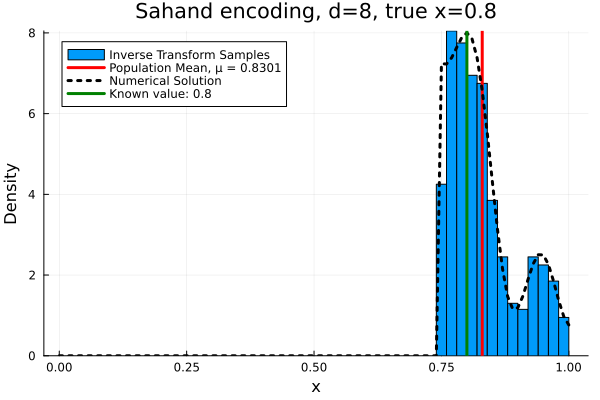

In [40]:
inspect_known_state_pdf(0.8, opts, 1000);

In [44]:
opts2 = Options(; nsweeps=20, chi_max=20,  update_iters=1, verbosity=0, dtype=Complex{Float64}, lg_iter=KLD_iter,
bbopt=BBOpt("CustomGD"), track_cost=false, eta=0.05, rescale = (false, true), d=4, aux_basis_dim=2, encoding=SplitBasis("Hist Split", "Stoudenmire"))

Options
  nsweeps: Int64 20
  chi_max: Int64 20
  cutoff: Float64 1.0e-10
  update_iters: Int64 1
  verbosity: Int64 0
  dtype: ComplexF64 <: Number
  lg_iter: KLD_iter (function of type typeof(KLD_iter))
  bbopt: BBOpt
  track_cost: Bool false
  eta: Float64 0.05
  rescale: Tuple{Bool, Bool}
  d: Int64 4
  aux_basis_dim: Int64 2
  encoding: SplitBasis


In [45]:
enc_args = opts2.encoding.init(ts_data, rand([0, 1], 100); opts=opts2);

In [46]:
state_val = get_state(0.51345, opts2, enc_args, 1)

4-element Vector{ComplexF64}:
                 0.0 + 0.0im
                 0.0 + 0.0im
  0.9168733523230315 + 0.37747942975914717im
 0.12004184165606284 - 0.049421575859698134im

In [47]:
rdm = state_val * state_val'

4×4 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im        0.0+0.0im              0.0+0.0im
 0.0+0.0im  0.0+0.0im        0.0+0.0im              0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.983147+0.0im        0.0914075+0.0906267im
 0.0-0.0im  0.0-0.0im  0.0914075-0.0906267im  0.0168525+0.0im

In [48]:
get_cpdf_mode(rdm, opts2, enc_args, 1)

(0.5134, ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.9170586766682248 + 0.37707948555903537im, 0.11992801616071047 - 0.04931243309566006im])

In [49]:
get_cpdf_mean_std(rdm, opts2, enc_args, 1)

(0.6347730899830277, 0.12009045781376529, ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.09037630144895682 + 0.8779726250059643im, 0.04813679505253339 - 0.46763131079795556im])

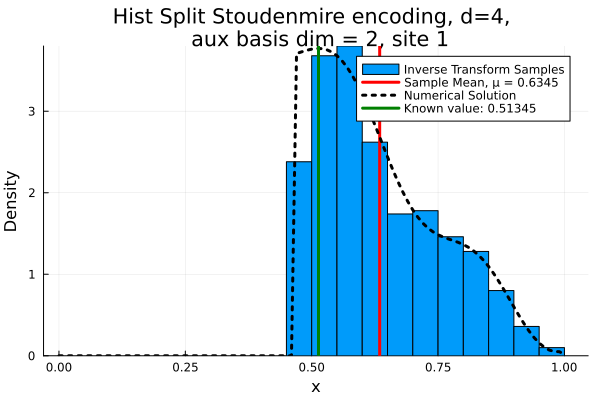

In [50]:
inspect_known_state_pdf(0.51345, opts2, enc_args, 1, 1000);

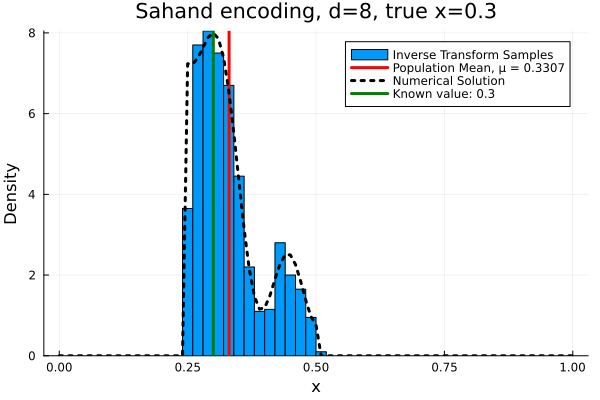

In [64]:
inspect_known_state_pdf(0.3, opts, 1000);

In [65]:
state_val = get_state(0.3, opts)

8-element Vector{ComplexF64}:
                 0.0 + 0.0im
                 0.0 + 0.0im
  0.7694208842938132 - 0.5590169943749479im
 0.24999999999999983 + 0.1816356320013403im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im

In [66]:
rdm = state_val * state_val'

8×8 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0-0.0im  0.0-0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im

In [67]:
get_cpdf_mean_std(rdm, opts)

(0.33228427065710064, 0.06359287725317297, ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.8691323402007227 - 0.01718878110911059im, 0.49418417684849286 + 0.00977345250030966im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im])